In [ ]:
# TODO popuniti kodom za problem 3a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
train_df = pd.concat([df[df['species'] == cls].iloc[:40] for cls in df['species'].unique()])
test_df = pd.concat([df[df['species'] == cls].iloc[40:] for cls in df['species'].unique()])

In [ ]:
X_train = train_df[['sepal_length', 'sepal_width']].values
y_train = train_df['species'].values
X_test = test_df[['sepal_length', 'sepal_width']].values
y_test = test_df['species'].values

In [ ]:
class_map = {label: idx for idx, label in enumerate(np.unique(y_train))}
class_map_inv = {v: k for k, v in class_map.items()}
y_train_encoded = np.array([class_map[label] for label in y_train])
y_test_encoded = np.array([class_map[label] for label in y_test])

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [ ]:
def predict_knn(X_train, y_train, x_query, k=3):
    distances = euclidean_distance(X_train, x_query)
    nearest_indices = distances.argsort()[:k]
    nearest_labels = y_train[nearest_indices]
    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

In [ ]:
y_pred = np.array([predict_knn(X_train, y_train_encoded, x, k=3) for x in X_test])
accuracy = np.mean(y_pred == y_test_encoded)
print(f"Accuracy on test set: {accuracy:.2f}")

Accuracy on test set: 0.67


In [ ]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.array([predict_knn(X_train, y_train_encoded, np.array([x, y]), k=3)
              for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

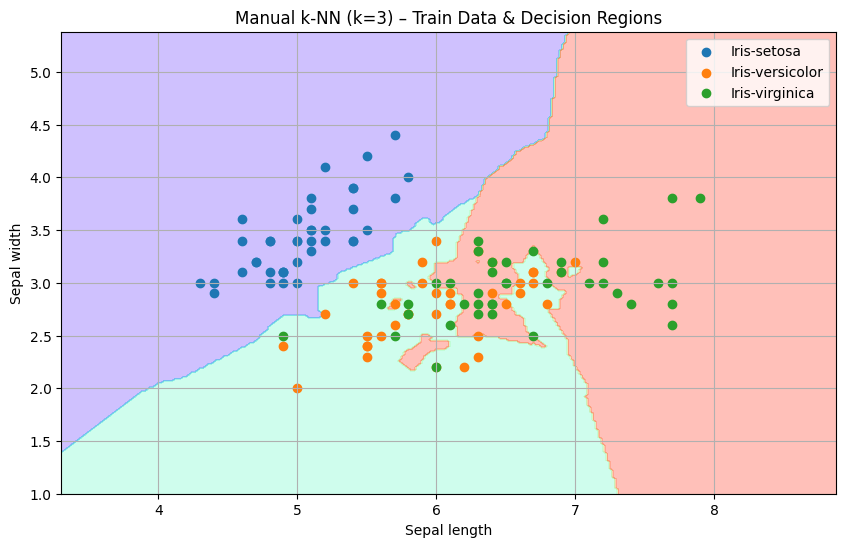

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)

for class_name, class_idx in class_map.items():
    plt.scatter(X_train[y_train_encoded == class_idx][:, 0],
                X_train[y_train_encoded == class_idx][:, 1],
                label=class_name)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Manual k-NN (k=3) – Train Data & Decision Regions")
plt.legend()
plt.grid(True)
plt.show()